In [27]:
import sys
import os
import requests
import numpy as np
from random import randint
import pickle
import keras
module_path = os.path.abspath(os.path.join('../'))
if module_path not in sys.path:
    sys.path.append(module_path)
import lm_lstm
from dotenv import load_dotenv

In [2]:
load_dotenv()

True

In [3]:
data_folder_local = os.path.join(os.getenv('DATA_ROOT_LOCAL'), 'goethe')

In [6]:
url = 'http://www.gutenberg.org/files/21000/21000-8.txt'

In [7]:
response = requests.get(url)

In [8]:
print(response.text[122:1400])

cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the terms of the Project Gutenberg License included
with this eBook or online at www.gutenberg.org


Title: Faust
       Eine Tragödie

Author: Johann Wolfgang von Goethe

Release Date: April 6, 2007 [EBook #21000]

Language: German

Character set encoding: ISO-8859-1

*** START OF THIS PROJECT GUTENBERG EBOOK FAUST ***




Produced by Markus Brenner and the Online Distributed
Proofreading Team at http://www.pgdp.net (This file made
from scans of public domain material at Klassik Stiftung
Weimar / Herzogin Anna Amalia Bibliothek.)






                _Faust._


            _Eine Tragödie._

                  _von_

                _Goethe._



               _Tübingen._

in der J. G. _Cotta_'schen Buchhandlung.

                  1808.




_Zueignung._


Ihr naht euch wieder, schwankende Gestalten!
Die früh sich einst dem trüben Blick gezeigt.
Versuch' ich wohl euch diesmal fest zu halt

In [9]:
with open(os.path.join(data_folder_local, 'faust_raw.txt'), mode='w', encoding='utf-8') as f:
    f.write(response.text)

In [4]:
with open(os.path.join(data_folder_local, 'faust_raw.txt'), mode='r', encoding='utf-8') as f:
    text = f.read()

In [5]:
text[122:1400]

"cost and with\n\nalmost no restrictions whatsoever.  You may copy it, give it away or\n\nre-use it under the terms of the Project Gutenberg License included\n\nwith this eBook or online at www.gutenberg.org\n\n\n\n\n\nTitle: Faust\n\n       Eine Tragödie\n\n\n\nAuthor: Johann Wolfgang von Goethe\n\n\n\nRelease Date: April 6, 2007 [EBook #21000]\n\n\n\nLanguage: German\n\n\n\nCharacter set encoding: ISO-8859-1\n\n\n\n*** START OF THIS PROJECT GUTENBERG EBOOK FAUST ***\n\n\n\n\n\n\n\n\n\nProduced by Markus Brenner and the Online Distributed\n\nProofreading Team at http://www.pgdp.net (This file made\n\nfrom scans of public domain material at Klassik Stiftung\n\nWeimar / Herzogin Anna Amalia Bibliothek.)\n\n\n\n\n\n\n\n\n\n\n\n\n\n                _Faust._\n\n\n\n\n\n            _Eine Tragödie._\n\n\n\n                  _von_\n\n\n\n                _Goethe._\n\n\n\n\n\n\n\n               _Tübingen._\n\n\n\nin der J. G. _Cotta_'schen Buchhandlung.\n\n\n\n                  1808.\n\n\n\n\n\n

In [18]:
# clean document
tokens = lm_lstm.clean_doc(text)
# we skip the gutenberg introduction
tokens = tokens[122:]
print(tokens[:200])
print('Total Tokens: %d' % len(tokens))
print('Unique Tokens: %d' % len(set(tokens)))

['ihr', 'naht', 'euch', 'wieder', 'schwankende', 'gestalten', 'die', 'früh', 'sich', 'einst', 'dem', 'trüben', 'blick', 'gezeigt', 'versuch', 'ich', 'wohl', 'euch', 'diesmal', 'fest', 'zu', 'halten', 'fühl', 'ich', 'mein', 'herz', 'noch', 'jenem', 'wahn', 'geneigt', 'ihr', 'drängt', 'euch', 'zu', 'nun', 'gut', 'so', 'mögt', 'ihr', 'walten', 'wie', 'ihr', 'aus', 'dunst', 'und', 'nebel', 'um', 'mich', 'steigt', 'mein', 'busen', 'fühlt', 'sich', 'jugendlich', 'erschüttert', 'vom', 'zauberhauch', 'der', 'euren', 'zug', 'umwittert', 'ihr', 'bringt', 'mit', 'euch', 'die', 'bilder', 'froher', 'tage', 'und', 'manche', 'liebe', 'schatten', 'steigen', 'auf', 'gleich', 'einer', 'alten', 'halbverklungnen', 'sage', 'kommt', 'erste', 'lieb', 'und', 'freundschaft', 'mit', 'herauf', 'der', 'schmerz', 'wird', 'neu', 'es', 'wiederholt', 'die', 'klage', 'des', 'lebens', 'labyrinthisch', 'irren', 'lauf', 'und', 'nennt', 'die', 'guten', 'die', 'um', 'schöne', 'stunden', 'vom', 'glück', 'getäuscht', 'vor', 

In [19]:
# organize into sequences of tokens
length = 50 + 1
sequences = list()
for i in range(length, len(tokens)):
    # select sequence of tokens
    seq = tokens[i-length:i]
    # convert into a line
    line = ' '.join(seq)
    # store
    sequences.append(line)
print('Total Sequences: %d' % len(sequences))
print(sequences[0:3])

Total Sequences: 33549
['ihr naht euch wieder schwankende gestalten die früh sich einst dem trüben blick gezeigt versuch ich wohl euch diesmal fest zu halten fühl ich mein herz noch jenem wahn geneigt ihr drängt euch zu nun gut so mögt ihr walten wie ihr aus dunst und nebel um mich steigt mein busen', 'naht euch wieder schwankende gestalten die früh sich einst dem trüben blick gezeigt versuch ich wohl euch diesmal fest zu halten fühl ich mein herz noch jenem wahn geneigt ihr drängt euch zu nun gut so mögt ihr walten wie ihr aus dunst und nebel um mich steigt mein busen fühlt', 'euch wieder schwankende gestalten die früh sich einst dem trüben blick gezeigt versuch ich wohl euch diesmal fest zu halten fühl ich mein herz noch jenem wahn geneigt ihr drängt euch zu nun gut so mögt ihr walten wie ihr aus dunst und nebel um mich steigt mein busen fühlt sich']


In [20]:
data = '\n'.join(sequences)
with open(os.path.join(data_folder_local, 'goethe_sequences.txt'), 'w') as f:
    f.write(data)

In [6]:
with open(os.path.join(data_folder_local, 'goethe_sequences.txt'), 'r') as f:
    seqs = f.read().split('\n')

In [7]:
seqs

['ihr naht euch wieder schwankende gestalten die früh sich einst dem trüben blick gezeigt versuch ich wohl euch diesmal fest zu halten fühl ich mein herz noch jenem wahn geneigt ihr drängt euch zu nun gut so mögt ihr walten wie ihr aus dunst und nebel um mich steigt mein busen',
 'naht euch wieder schwankende gestalten die früh sich einst dem trüben blick gezeigt versuch ich wohl euch diesmal fest zu halten fühl ich mein herz noch jenem wahn geneigt ihr drängt euch zu nun gut so mögt ihr walten wie ihr aus dunst und nebel um mich steigt mein busen fühlt',
 'euch wieder schwankende gestalten die früh sich einst dem trüben blick gezeigt versuch ich wohl euch diesmal fest zu halten fühl ich mein herz noch jenem wahn geneigt ihr drängt euch zu nun gut so mögt ihr walten wie ihr aus dunst und nebel um mich steigt mein busen fühlt sich',
 'wieder schwankende gestalten die früh sich einst dem trüben blick gezeigt versuch ich wohl euch diesmal fest zu halten fühl ich mein herz noch jenem wahn 

7006
Instructions for updating:
Colocations handled automatically by placer.


WARNING - From c:\users\s0k8fj\projects\amldemo\venv\lib\site-packages\tensorflow\python\framework\op_def_library.py:263: colocate_with (from tensorflow.python.framework.ops) is deprecated and will be removed in a future version.
Instructions for updating:
Colocations handled automatically by placer.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 50, 50)            350300    
_________________________________________________________________
lstm_1 (LSTM)                (None, 50, 100)           60400     
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 7006)              707606    
Total params: 1,208,806
Trainable params: 1,208,806
Non-trainable params: 0
_________________________________________________________________
None
Instructions for updating:
Use tf.cast instead.


WARNING - From c:\users\s0k8fj\projects\amldemo\venv\lib\site-packages\tensorflow\python\ops\math_ops.py:3066: to_int32 (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.cast instead.


Epoch 1/5
 - 161s - loss: 7.3402 - acc: 0.0259
Attempted to log scalar metric Loss:
7.340212646442191
Epoch 2/5


c:\users\s0k8fj\projects\amldemo\venv\lib\site-packages\keras\callbacks.py:842: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,acc
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning
c:\users\s0k8fj\projects\amldemo\venv\lib\site-packages\keras\callbacks.py:707: RuntimeWarning: Can save best model only with val_loss available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


 - 165s - loss: 6.9788 - acc: 0.0305
Attempted to log scalar metric Loss:
6.9787864420693895
Epoch 3/5
 - 163s - loss: 6.8464 - acc: 0.0327
Attempted to log scalar metric Loss:
6.846391033972069
Epoch 4/5
 - 189s - loss: 6.7415 - acc: 0.0356
Attempted to log scalar metric Loss:
6.74150586117575
Epoch 5/5
 - 186s - loss: 6.5421 - acc: 0.0432
Attempted to log scalar metric Loss:
6.542080327158248
Attempted to log image metric Loss:
<module 'matplotlib.pyplot' from 'c:\\users\\s0k8fj\\projects\\amldemo\\venv\\lib\\site-packages\\matplotlib\\pyplot.py'>
model saved in folder C:\\Users\\S0K8FJ\\Projects\\amldemoOut\goethe\model_goethe


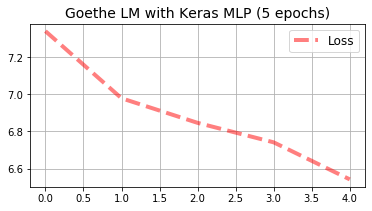

In [8]:
model = lm_lstm.train(data_folder=data_folder_local,
                      fn_sequences='goethe_sequences.txt',
                      batch_size=20,
                      n_epochs=5,
                      output_folder=data_folder_local
                     )

In [11]:
with open(os.path.join(data_folder_local, 'goethe_sequences.txt'), 'r') as f:
    lines = f.read().split('\n')

In [12]:
seq_length = len(lines[0].split()) - 1
print(seq_length)

50


In [19]:
# load the model
with open(os.path.join(data_folder_local, 'model_goethe', 'model.json'), 'r') as f:
    m_json = f.read()
model = keras.models.model_from_json(m_json)

In [24]:
tokenizer = pickle.load(open(os.path.join(data_folder_local, 'model_goethe', 'tokenizer.pkl'), 'rb'))

In [34]:
# generate a sequence from a language model
def generate_seq(model, tokenizer, seq_length, seed_text, n_words):
    result = list()
    in_text = seed_text
    # generate a fixed number of words
    for _ in range(n_words):
        # encode the text as integer
        encoded = tokenizer.texts_to_sequences([in_text])[0]
        # truncate sequences to a fixed length
        encoded = keras.preprocessing.sequence.pad_sequences([encoded], maxlen=seq_length, truncating='pre')
        # predict probabilities for each word
        yhat = model.predict_classes(encoded, verbose=0)
        # map predicted word index to word
        out_word = ''
        for word, index in tokenizer.word_index.items():
            if index == yhat:
                out_word = word
                break
        # append to input
        in_text += ' ' + out_word
        result.append(out_word)
    return ' '.join(result)

In [25]:
# set a seed text
seed_text = lines[randint(0,len(lines))]
print(seed_text + '\n')

da folgt der ganze hexenhauf stimme welchen weg kommst du her stimme uebern ilsenstein da guckt ich der eule ins nest hinein die macht ein paar augen stimme o fahre zur hölle was reitst du so schnelle stimme mich hat sie geschunden da sieh nur die wunden hexen chor der weg



In [35]:
generate_seq(model, tokenizer, seq_length, seed_text, 50)

'willkommner basses basses basses messen messen innerlich innerlich granted granted losgebunden losgebunden losgebunden schnell schnell losgebunden losgebunden haß haß thirty thirty thirty vollendeter hülflos hülflos hülflos verschwand bannte bannte bannte thirty thirty thirty zwanzig meister hülflos hülflos hülflos hülflos hülflos bannte bannte meerkatzen meerkatzen meerkatzen sang sang boten boten boten'